In [10]:
%reset -f
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import crc
import json
import time

In [12]:
rc_params = {
    'axes.grid'             : False,
    'axes.labelsize'        : 24,
    'axes.linewidth'        : 1,
    'axes.titlesize'        : 24,
    'font.size'             : 24,
    'legend.fontsize'       : 16,
    'xtick.labelsize'       : 16,
    'ytick.labelsize'       : 16,
    # 'font.family'           :'sans-serif',
    'font.family'           :'serif',
    'text.latex.preamble'   : r'\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}',
    'text.usetex'           : False,
    'patch.force_edgecolor' : True,
    'figure.dpi'            : 256,
    'mathtext.fontset'      : 'cm'     
}

mpl.rcParams.update(rc_params)

In [16]:
scenario = 'AS'
n        = 3
# modes    = ['2,2', '2,1', '3,3', '3,2', '4,4', '4,3']
modes    = ['2,2', '2,1', '3,3', '4,4', '4,3', '3,2']
# modes    = ['2,2', '2,1', '3,3']

In [17]:
sthts = {}
st1ts = {}
st2ts = {}
mismatches = {}

for mod in modes:
    sthts[mod] = {}
    st1ts[mod] = {}
    st2ts[mod] = {}
    mismatches[mod] = ()
    
    # with open(f"../stats/{scenario}/{n}/{mod.replace(',', '_')}/h/stats_SEOBNRv5HM_h", 'r') as infile:
    #     sthts[mod].update(json.load(infile))

    sthts[mod] = np.array(list(sthts[mod].values()))

    for component in ['A', 'phi']:
        with open(f"../stats/{scenario}/{n}/{mod.replace(',', '_')}/{component}/stats_p1peline_{component}", 'r') as infile:
            st1ts[mod].update({component: json.load(infile)})
        with open(f"../stats/{scenario}/{n}/{mod.replace(',', '_')}/{component}/stats_p2peline_{component}", 'r') as infile:
            st2ts[mod].update({component: json.load(infile)})
            
    mismatches[mod] = np.load(f"../stats/{scenario}/{n}/{mod.replace(',', '_')}/full_mismatches.npy")

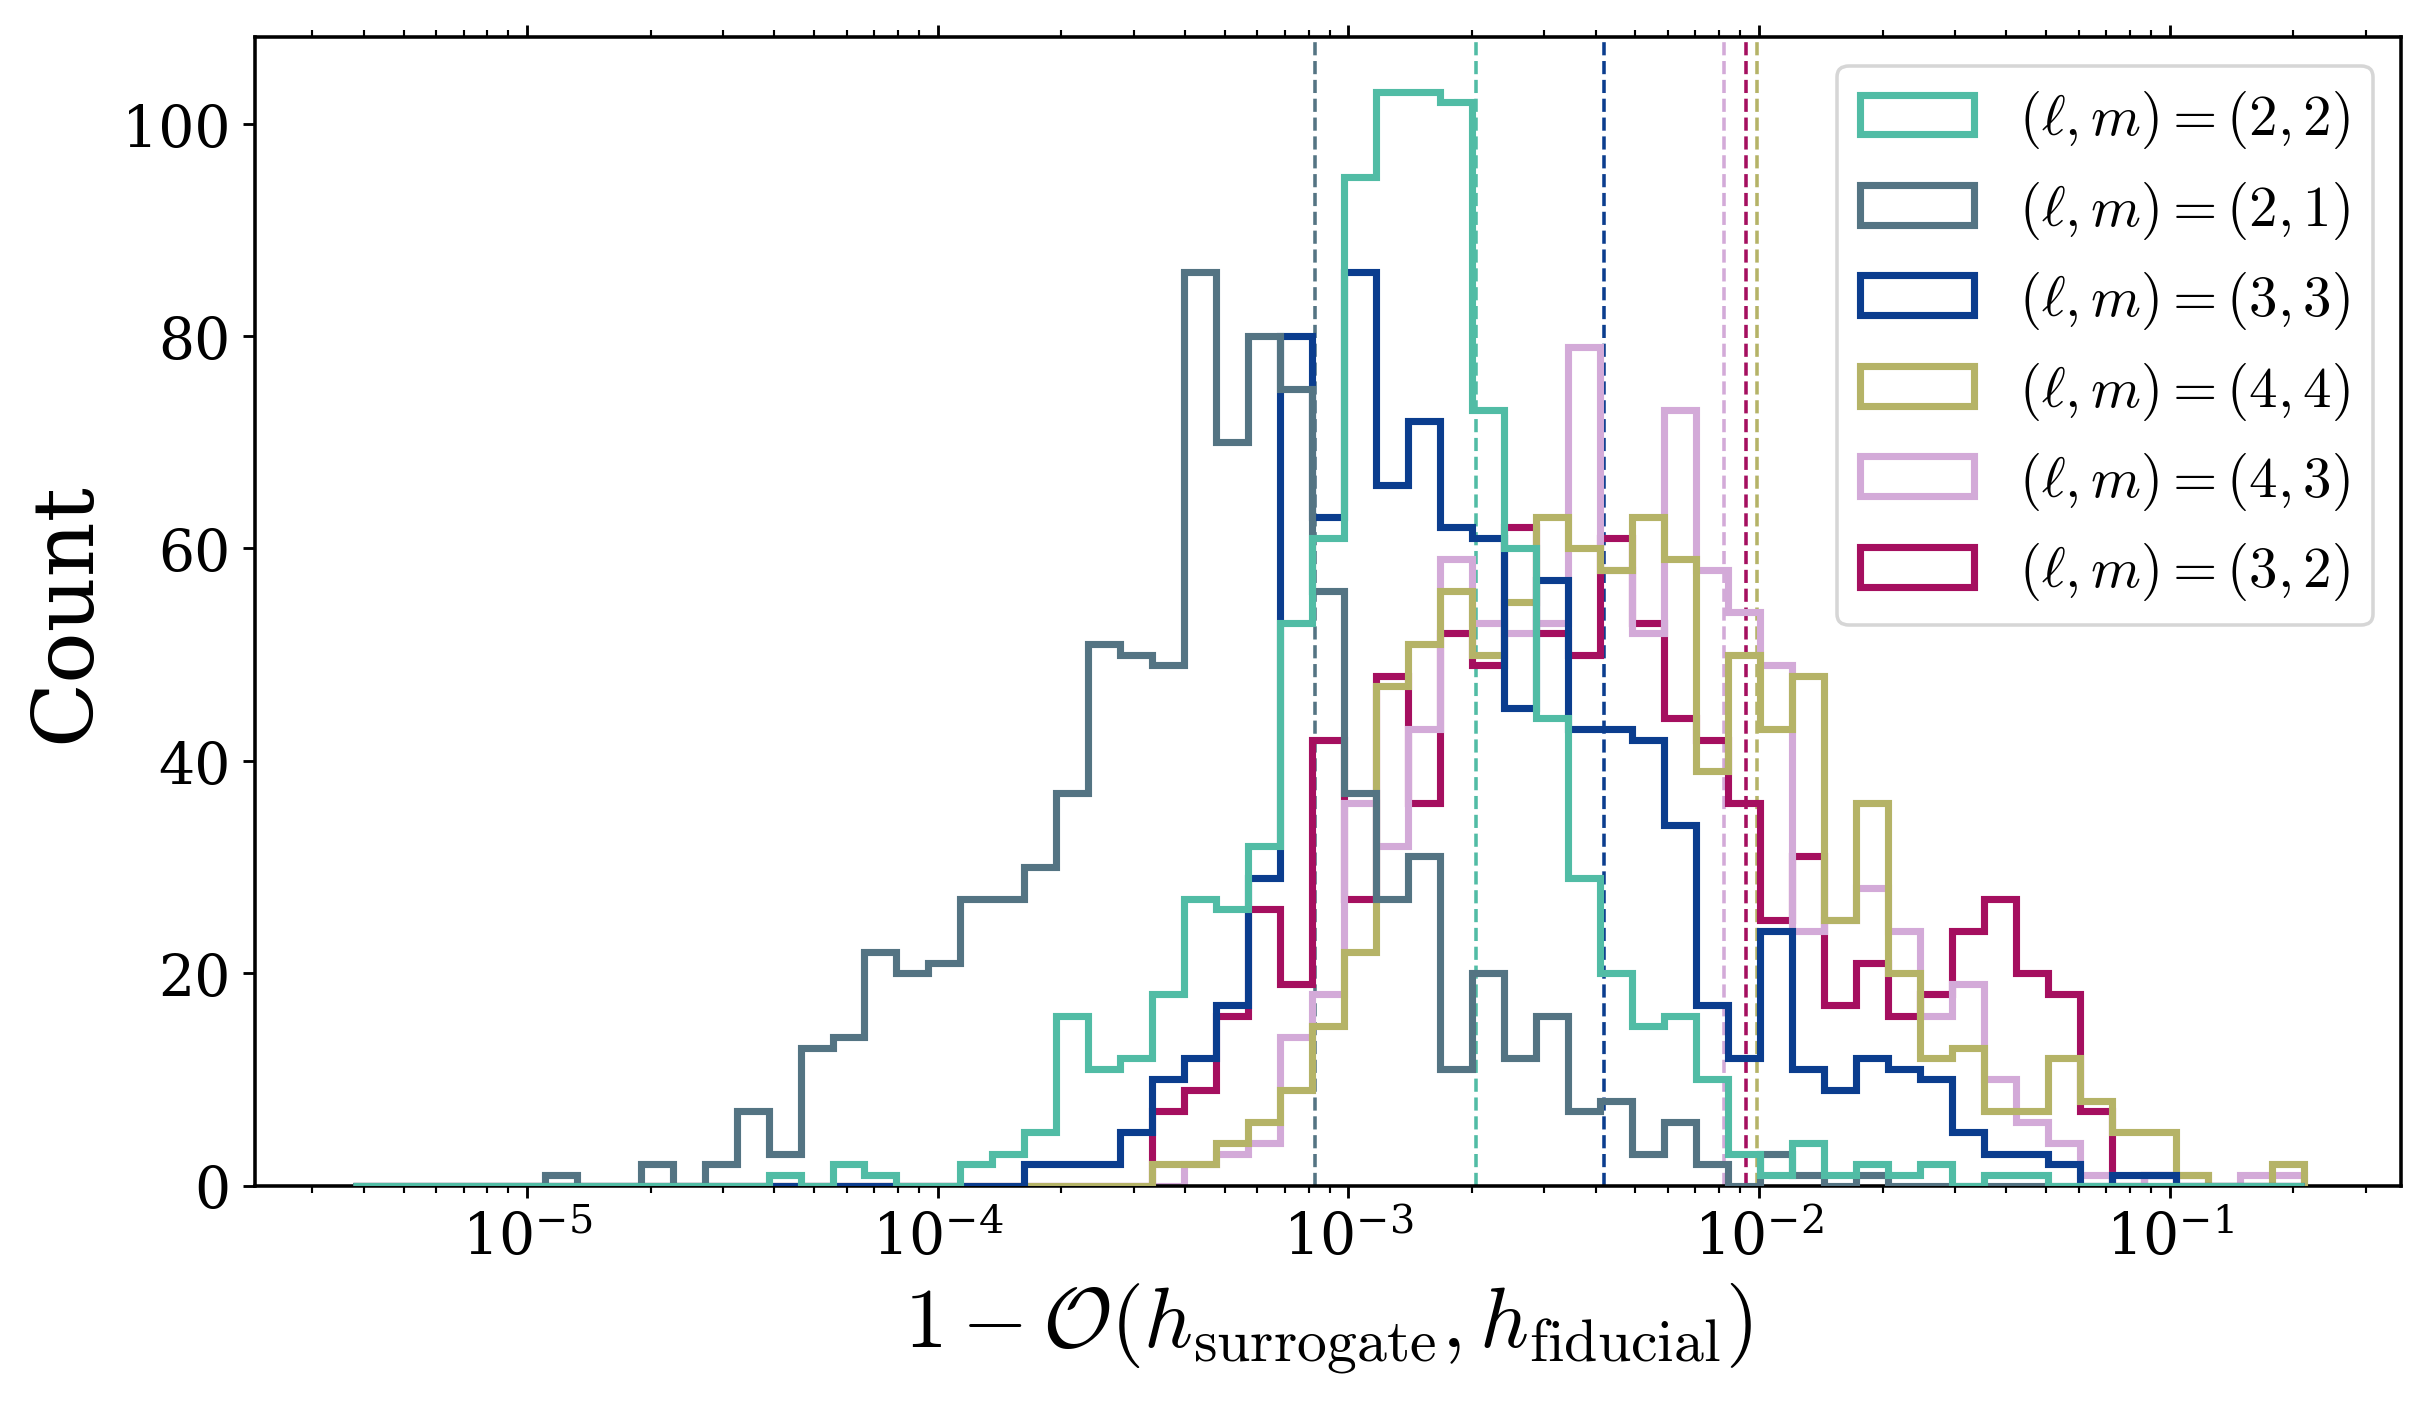

In [18]:
# plot mismatches
c = crc.GET_COLOURS()

bot, top = [], []
means = {}
for mode in mismatches:
    bot.append(np.log10(np.min(mismatches[mode])))
    top.append(np.log10(np.max(mismatches[mode])))
    means.update({mode: np.mean(mismatches[mode])})
bot, top = np.min(np.array(bot)), np.max(np.array(top))
log_range = int(top - bot)

bins = 61
logbins = np.logspace(bot, top, bins+1)

CNTS = {}
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
for i, mode in enumerate(modes):  
    cnts, barlocs, _ = ax.hist(mismatches[mode], bins = logbins, histtype = 'step', cumulative = False, linewidth = 2, 
                               label = rf"$(\ell,  m) = ({mode})$", zorder = len(modes) - i, color = c[mode])
    cnt = cnts[np.where(barlocs - means[mode] < 0)[0][-1]]
    CNTS.update({i: cnt})
    
y_max = ax.get_ylim()[1]

for i, mode in enumerate(modes):
    ax.axvline(means[mode], color = c[mode], linestyle = '--', linewidth = 1, zorder = 0,
               # ymin = CNTS[i] / y_max, ymax = 1)
              )

# ax.set_ylim(0, 175)
ax.xaxis.set_ticks_position('both')
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_xlabel(r'$1 - \mathcal{O}(h_{\text{surrogate}}, h_{\text{fiducial}})$')
ax.set_ylabel(r'Count')
ax.legend()
plt.tight_layout()
plt.savefig(f"../figures/{scenario}/{n}/mismatch_hist_all_modes")
plt.show()

In [ ]:
# draw mismatch against mass
%autoreload
# mode = '2,2'
nT   = 1
t_i = time.time()
waveformsT = crc.add_A_phi(crc.load_waveforms(scenario, nT, mode))
print(f"\n{time.time() - t_i:.3f} seconds")
print(len(waveformsT))

In [10]:
import lal, lalsimulation
# lal.swig_redirect_standard_output_error(True)
from pycbc.types import *
from pycbc import waveform as pywaveform
from pycbc import filter as pyfilter
from pycbc import detector as pydetector
from pycbc import psd as pypsd

dt = 50 * lal.MTSUN_SI # dt in geometric time, t/M, is 1. so dt in seconds is 50 solar masses (consistency choice)

h1_ts = timeseries.TimeSeries(h1.real, delta_t = dt)
h2_ts = timeseries.TimeSeries(h2.real, delta_t = dt)
t_len  = max(len(h1_ts.sample_times), len(h2_ts.sample_times))

delta_f = 1 / h1_ts.duration
f_len = t_len//2 + 1
f_min = 20
# f_max = 4096
f_max = 2048

NameError: name 'h1' is not defined

In [5]:
psd_aLIGO = pypsd.aLIGODesignSensitivityP1200087(f_len, delta_f, f_min) 

<module 'pycbc.psd' from '/rds/projects/p/pratteng-gwastro/conda/envs/igwn-py311-2023/lib/python3.11/site-packages/pycbc/psd/__init__.py'>

In [62]:
# %matplotlib inline

# Read in the data around GW150914
from pycbc.catalog import Merger
import pylab

m = Merger('GW150914')

data = {}
labels = {}
for ifo in ['H1', 'L1']:
    data[ifo] = m.strain(ifo)

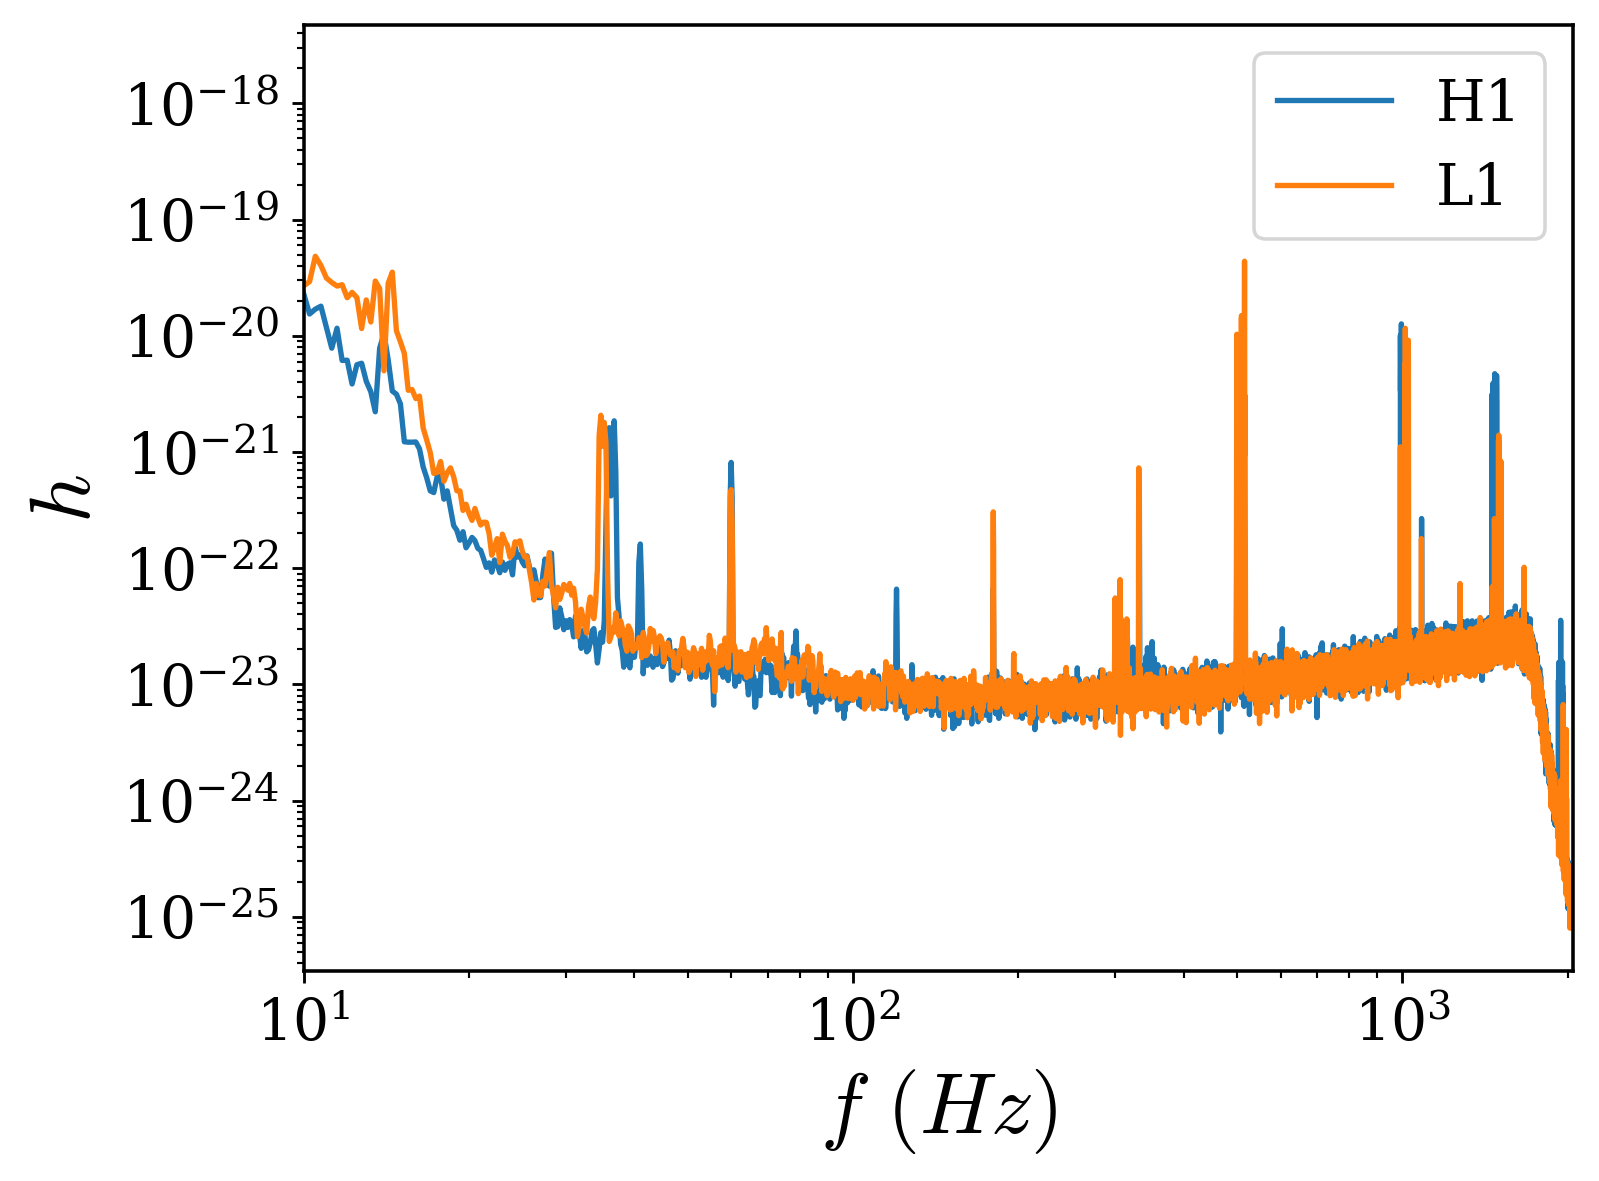

In [35]:
for ifo in data:
    # This estimates the PSD by sub-dividing the data into overlapping
    # 4s long segments. (See Welch's method)
    psd = data[ifo].psd(4)
    
    # Note that the psd is a FrequencySeries!
    plt.loglog(psd.sample_frequencies, psd ** (1/2), label = fr"{ifo}")
    
plt.ylabel(fr"$h$")
plt.xlabel(fr"$f~(Hz)$")
plt.xlim(10, 2048)
plt.legend()
plt.show()